In [1]:
from mm_ab import *

/home/charubaiel/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:

@dataclass
class User:
    '''
    Имитируем создание типичного пользователя, который будет генерировать клики
    ctr - Наш "настоящий" кликрейт по этому типу пользователя
    actions - Наше кол-во действий пользователя
    '''
    ctr:float = 0.1
    actions:int = 10
    def _generate_binary(self):
        self.binary_stats = sps.bernoulli(self.ctr).rvs(self.actions)
        return self.binary_stats

In [3]:
def generate_data_bts():
    '''
    функция для генерации пользовательских псевдо АБ групп
    '''
    by_user_diff = []
    by_events_diff = []
    control_base = User(0.1,10)
    control_active = User(0.1,100)
    threatment_base = User(0.1,10)
    threatment_active = User(0.11,100)
    for _ in tqdm(range (1000)):
        control_group = [control_base._generate_binary() for _ in range(900)] + [control_active._generate_binary() for _ in range(100)]
        threatment_group = [threatment_base._generate_binary() for _ in range(900)] + [threatment_active._generate_binary() for _ in range(100)]

        by_events_diff.append( pd.Series(control_group).explode().mean() - pd.Series(threatment_group).explode().mean())
        by_user_diff.append( pd.Series(control_group).apply(np.mean).mean() - pd.Series(threatment_group).apply(np.mean).mean())

    return pd.DataFrame({'by_user_diff':by_user_diff,'by_events_diff':by_events_diff})

In [4]:
zz = generate_data_bts()

100%|██████████| 1000/1000 [09:59<00:00,  1.67it/s]


In [7]:
sps.ttest_ind(*zz.values.T)

Ttest_indResult(statistic=25.088025562736497, pvalue=5.596637834049664e-121)

<AxesSubplot:ylabel='Density'>

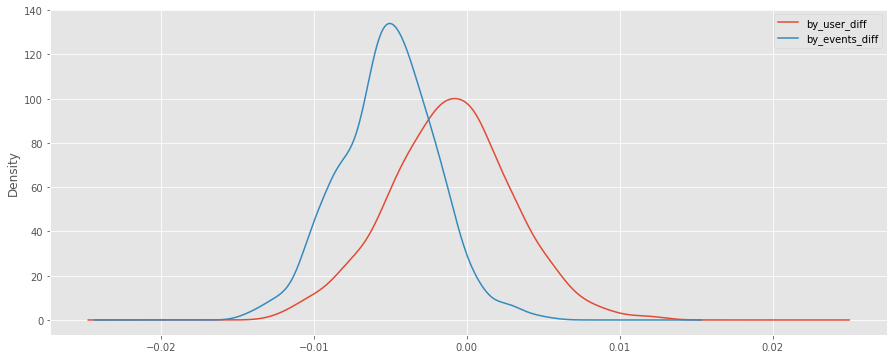

In [5]:
zz.plot.kde()